In [36]:
%matplotlib inline
from tonic.models.vic import (netcdf2vic, compare_soil_params, grid_params, 
                              ncparam2ascii, vic2netcdf)
import numpy as np
import argparse
import subprocess
import os
from tonic import version
from scipy.spatial import cKDTree
from tonic.io import read_netcdf
from netCDF4 import Dataset, default_fillvals
import xarray as xr


In [37]:
# import NetCDF params file
direc = '/Users/diana/Dropbox/UW/Research/rasm/25_km'
ncparams_25km = 'vic_params_wr25b_vic5.0.dev_20170915.nc'
ncparams_50km = 'vic_params_joe_copy.nc'
params_25km = xr.open_dataset(os.path.join(direc, ncparams_25km))
params_50km = xr.open_dataset(os.path.join(direc, ncparams_50km))
domain = xr.open_dataset(os.path.join(direc, 'domain.lnd.wr25b_ar9v4.170413.nc'))

root depth

In [38]:
direc_rootdepth = '/Users/diana/Dropbox/UW/Research/rasm/25_km/root_depth'
filename = 'root_depth.1.25km.nc'
rd1 = xr.open_dataset(os.path.join(direc_rootdepth, 'root_depth.0.25km.nc'))
rd2 = xr.open_dataset(os.path.join(direc_rootdepth, 'root_depth.1.25km.nc'))
rd3 = xr.open_dataset(os.path.join(direc_rootdepth, 'root_depth.2.25km.nc'))
root_depth = xr.concat([rd1, rd2, rd3], data_vars={'root_depth'}, dim='root_zone')

root fract

In [39]:
direc_rootdepth = '/Users/diana/Dropbox/UW/Research/rasm/25_km/root_fract'
filename = 'root_fract.0.25km.nc'
rd1 = xr.open_dataset(os.path.join(direc_rootdepth, 'root_fract.0.25km.nc'))
rd2 = xr.open_dataset(os.path.join(direc_rootdepth, 'root_fract.1.25km.nc'))
rd3 = xr.open_dataset(os.path.join(direc_rootdepth, 'root_fract.2.25km.nc'))
root_fract = xr.concat([rd1, rd2, rd3], data_vars={'root_fract'}, dim='root_zone')

displacement

In [40]:
direc = '/Users/diana/Dropbox/UW/Research/rasm/25_km/displacement'
filename = 'displacement.0.25km.nc'
rd1 = xr.open_dataset(os.path.join(direc, 'displacement.0.25km.nc'))
rd2 = xr.open_dataset(os.path.join(direc, 'displacement.1.25km.nc'))
rd3 = xr.open_dataset(os.path.join(direc, 'displacement.2.25km.nc'))
rd4 = xr.open_dataset(os.path.join(direc, 'displacement.3.25km.nc'))
rd5 = xr.open_dataset(os.path.join(direc, 'displacement.4.25km.nc'))
rd6 = xr.open_dataset(os.path.join(direc, 'displacement.5.25km.nc'))
rd7 = xr.open_dataset(os.path.join(direc, 'displacement.6.25km.nc'))
rd8 = xr.open_dataset(os.path.join(direc, 'displacement.7.25km.nc'))
rd9 = xr.open_dataset(os.path.join(direc, 'displacement.8.25km.nc'))
rd10 = xr.open_dataset(os.path.join(direc, 'displacement.9.25km.nc'))
rd11 = xr.open_dataset(os.path.join(direc, 'displacement.10.25km.nc'))
rd12 = xr.open_dataset(os.path.join(direc, 'displacement.11.25km.nc'))
displacement = xr.concat([rd1, rd2, rd3, rd4, rd5, rd6, rd7, rd8, rd9, rd10, rd11, rd12], 
                         data_vars={'displacement'},
                         dim='month')

albedo

In [41]:
direc = '/Users/diana/Dropbox/UW/Research/rasm/25_km/albedo'
filename = 'albedo.0.25km.nc'
rd1 = xr.open_dataset(os.path.join(direc, 'albedo.0.25km.nc'))
rd2 = xr.open_dataset(os.path.join(direc, 'albedo.1.25km.nc'))
rd3 = xr.open_dataset(os.path.join(direc, 'albedo.2.25km.nc'))
rd4 = xr.open_dataset(os.path.join(direc, 'albedo.3.25km.nc'))
rd5 = xr.open_dataset(os.path.join(direc, 'albedo.4.25km.nc'))
rd6 = xr.open_dataset(os.path.join(direc, 'albedo.5.25km.nc'))
rd7 = xr.open_dataset(os.path.join(direc, 'albedo.6.25km.nc'))
rd8 = xr.open_dataset(os.path.join(direc, 'albedo.7.25km.nc'))
rd9 = xr.open_dataset(os.path.join(direc, 'albedo.8.25km.nc'))
rd10 = xr.open_dataset(os.path.join(direc, 'albedo.9.25km.nc'))
rd11 = xr.open_dataset(os.path.join(direc, 'albedo.10.25km.nc'))
rd12 = xr.open_dataset(os.path.join(direc, 'albedo.11.25km.nc'))
albedo = xr.concat([rd1, rd2, rd3, rd4, rd5, rd6, rd7, rd8, rd9, rd10, rd11, rd12], 
                    data_vars={'albedo'},
                    dim='month')

veg rough

In [42]:
direc = '/Users/diana/Dropbox/UW/Research/rasm/25_km/veg_rough'
filename = 'veg_rough.0.25km.nc'
rd1 = xr.open_dataset(os.path.join(direc, 'veg_rough.0.25km.nc'))
rd2 = xr.open_dataset(os.path.join(direc, 'veg_rough.1.25km.nc'))
rd3 = xr.open_dataset(os.path.join(direc, 'veg_rough.2.25km.nc'))
rd4 = xr.open_dataset(os.path.join(direc, 'veg_rough.3.25km.nc'))
rd5 = xr.open_dataset(os.path.join(direc, 'veg_rough.4.25km.nc'))
rd6 = xr.open_dataset(os.path.join(direc, 'veg_rough.5.25km.nc'))
rd7 = xr.open_dataset(os.path.join(direc, 'veg_rough.6.25km.nc'))
rd8 = xr.open_dataset(os.path.join(direc, 'veg_rough.7.25km.nc'))
rd9 = xr.open_dataset(os.path.join(direc, 'veg_rough.8.25km.nc'))
rd10 = xr.open_dataset(os.path.join(direc, 'veg_rough.9.25km.nc'))
rd11 = xr.open_dataset(os.path.join(direc, 'veg_rough.10.25km.nc'))
rd12 = xr.open_dataset(os.path.join(direc, 'veg_rough.11.25km.nc'))
veg_rough = xr.concat([rd1, rd2, rd3, rd4, rd5, rd6, rd7, rd8, rd9, rd10, rd11, rd12], 
                       data_vars={'veg_rough'},
                       dim='month')

LAI

In [43]:
direc = '/Users/diana/Dropbox/UW/Research/rasm/25_km/LAI'
filename = 'LAI.0.25km.nc'
rd1 = xr.open_dataset(os.path.join(direc, 'LAI.0.25km.nc'))
rd2 = xr.open_dataset(os.path.join(direc, 'LAI.1.25km.nc'))
rd3 = xr.open_dataset(os.path.join(direc, 'LAI.2.25km.nc'))
rd4 = xr.open_dataset(os.path.join(direc, 'LAI.3.25km.nc'))
rd5 = xr.open_dataset(os.path.join(direc, 'LAI.4.25km.nc'))
rd6 = xr.open_dataset(os.path.join(direc, 'LAI.5.25km.nc'))
rd7 = xr.open_dataset(os.path.join(direc, 'LAI.6.25km.nc'))
rd8 = xr.open_dataset(os.path.join(direc, 'LAI.7.25km.nc'))
rd9 = xr.open_dataset(os.path.join(direc, 'LAI.8.25km.nc'))
rd10 = xr.open_dataset(os.path.join(direc, 'LAI.9.25km.nc'))
rd11 = xr.open_dataset(os.path.join(direc, 'LAI.10.25km.nc'))
rd12 = xr.open_dataset(os.path.join(direc, 'LAI.11.25km.nc'))
LAI = xr.concat([rd1, rd2, rd3, rd4, rd5, rd6, rd7, rd8, rd9, rd10, rd11, rd12], 
                data_vars={'LAI'},        
                dim='month')

add the 4-D variables to the remapped 25km Dataset

In [44]:
params_25km['root_depth'] = root_depth['root_depth']
params_25km['root_fract'] = root_fract['root_fract']
params_25km['displacement'] = displacement['displacement']
params_25km['albedo'] = albedo['albedo']
params_25km['veg_rough'] = veg_rough['veg_rough']
params_25km['LAI'] = LAI['LAI']

make sure dimensions are in the correct order for the 4-D variables

In [53]:
params_25km['root_depth'] = params_25km['root_depth'].transpose('veg_class', 'root_zone', 'nj', 'ni')
params_25km['root_fract'] = params_25km['root_fract'].transpose('veg_class', 'root_zone', 'nj', 'ni')
params_25km['displacement'] = params_25km['displacement'].transpose('veg_class', 'month', 'nj', 'ni')
params_25km['albedo'] = params_25km['albedo'].transpose('veg_class', 'month', 'nj', 'ni')
params_25km['veg_rough'] = params_25km['veg_rough'].transpose('veg_class', 'month', 'nj', 'ni')
params_25km['LAI'] = params_25km['LAI'].transpose('veg_class', 'month', 'nj', 'ni')

In [54]:
# params_25km.data_vars

In [55]:
params_25km['run_cell'].values = params_25km['run_cell'].where(domain['mask'] == 1)
params_25km['gridcell'].values = params_25km['gridcell'].where(domain['mask'] == 1)
params_25km['infilt'].values = params_25km['infilt'].where(domain['mask'] == 1)
params_25km['Ds'].values = params_25km['Ds'].where(domain['mask'] == 1)
params_25km['Dsmax'].values = params_25km['Dsmax'].where(domain['mask'] == 1)
params_25km['Ws'].values = params_25km['Ws'].where(domain['mask'] == 1)
params_25km['c'].values = params_25km['c'].where(domain['mask'] == 1)
params_25km['expt'].values = params_25km['expt'].where(domain['mask'] == 1)
params_25km['Ksat'].values = params_25km['Ksat'].where(domain['mask'] == 1)
params_25km['phi_s'].values = params_25km['phi_s'].where(domain['mask'] == 1)
params_25km['init_moist'].values = params_25km['init_moist'].where(domain['mask'] == 1)
params_25km['elev'].values = params_25km['elev'].where(domain['mask'] == 1)
params_25km['depth'].values = params_25km['depth'].where(domain['mask'] == 1)
params_25km['avg_T'].values = params_25km['avg_T'].where(domain['mask'] == 1)
params_25km['dp'].values = params_25km['dp'].where(domain['mask'] == 1)
params_25km['bubble'].values = params_25km['bubble'].where(domain['mask'] == 1)
params_25km['quartz'].values = params_25km['quartz'].where(domain['mask'] == 1)
params_25km['bulk_density'].values = params_25km['bulk_density'].where(domain['mask'] == 1)
params_25km['soil_density'].values = params_25km['soil_density'].where(domain['mask'] == 1)
params_25km['off_gmt'].values = params_25km['off_gmt'].where(domain['mask'] == 1)
params_25km['Wcr_FRACT'].values = params_25km['Wcr_FRACT'].where(domain['mask'] == 1)
params_25km['Wpwp_FRACT'].values = params_25km['Wpwp_FRACT'].where(domain['mask'] == 1)
params_25km['rough'].values = params_25km['rough'].where(domain['mask'] == 1)
params_25km['snow_rough'].values = params_25km['snow_rough'].where(domain['mask'] == 1)
params_25km['annual_prec'].values = params_25km['annual_prec'].where(domain['mask'] == 1)
params_25km['resid_moist'].values = params_25km['resid_moist'].where(domain['mask'] == 1)
params_25km['fs_active'].values = params_25km['fs_active'].where(domain['mask'] == 1)
params_25km['cellnum'].values = params_25km['cellnum'].where(domain['mask'] == 1)
params_25km['AreaFract'].values = params_25km['AreaFract'].where(domain['mask'] == 1)
params_25km['elevation'].values = params_25km['elevation'].where(domain['mask'] == 1)
params_25km['Pfactor'].values = params_25km['Pfactor'].where(domain['mask'] == 1)
params_25km['Nveg'].values = params_25km['Nveg'].where(domain['mask'] == 1)
params_25km['Cv'].values = params_25km['Cv'].where(domain['mask'] == 1)
params_25km['overstory'].values = params_25km['overstory'].where(domain['mask'] == 1)
params_25km['rarc'].values = params_25km['rarc'].where(domain['mask'] == 1)
params_25km['rmin'].values = params_25km['rmin'].where(domain['mask'] == 1)
params_25km['wind_h'].values = params_25km['wind_h'].where(domain['mask'] == 1)
params_25km['RGL'].values = params_25km['RGL'].where(domain['mask'] == 1)
params_25km['rad_atten'].values = params_25km['rad_atten'].where(domain['mask'] == 1)
params_25km['wind_atten'].values = params_25km['wind_atten'].where(domain['mask'] == 1)
params_25km['trunk_ratio'].values = params_25km['trunk_ratio'].where(domain['mask'] == 1)
params_25km['snow_albedo'].values = params_25km['snow_albedo'].where(domain['mask'] == 1)
params_25km['root_depth'].values = params_25km['root_depth'].where(domain['mask'] == 1)
params_25km['root_fract'].values = params_25km['root_fract'].where(domain['mask'] == 1)
params_25km['displacement'].values = params_25km['displacement'].where(domain['mask'] == 1)
params_25km['albedo'].values = params_25km['albedo'].where(domain['mask'] == 1)
params_25km['veg_rough'].values = params_25km['veg_rough'].where(domain['mask'] == 1)
params_25km['LAI'].values = params_25km['LAI'].where(domain['mask'] == 1)

//anaconda/envs/vic_test_env/lib/python3.5/site-packages/matplotlib/figure.py:1744: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


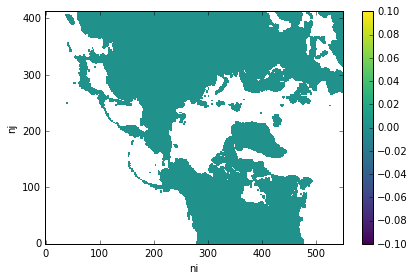

In [56]:
(params_25km['run_cell'] - domain.mask).plot()

adjust dtype for `run_cell`

In [57]:
# adjust dtype for 
params_25km['run_cell'].values = params_25km['run_cell'].values.astype(np.int32)
params_25km['gridcell'].values = params_25km['gridcell'].values.astype(np.int32)
params_25km['fs_active'].values = params_25km['fs_active'].values.astype(np.int32)
params_25km['Nveg'].values = params_25km['Nveg'].values.astype(np.int32)
params_25km['overstory'].values = params_25km['overstory'].values.astype(np.int32)

In [58]:
params_25km.to_netcdf('params_25km_full.nc', format='NETCDF4_CLASSIC', encoding={'run_cell': {'dtype': 'int32'},
                                                                                 'gridcell': {'dtype': 'int32'},
                                                                                 'fs_active': {'dtype': 'int32'},
                                                                                 'Nveg': {'dtype': 'int32'},
                                                                                 'overstory': {'dtype': 'int32'},
                                                                                 })

In [59]:
u = xr.open_dataset('params_25km_full.nc')

In [60]:
print(u.albedo.dims)
print(params_50km.albedo.dims)

('veg_class', 'month', 'nj', 'ni')
('veg_class', 'month', 'nj', 'ni')


## NOTE: after the above processing, also need to rename `xc_bnds` and `yc_bnds` dimensions, using the following: 

`ncrename -v xc_bnds,xv params_25km_full.nc`

`ncrename -v yc_bnds,yv params_25km_full.nc`